<a href="https://colab.research.google.com/github/yusuf1489/YSF/blob/master/ANN_UYGULAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello")

hello


# YAPAY SİNİR AĞLARI (ANN) ile Rakam Tanıma

1.  İş Problemi (Business Problem)
2.  Veriyi Anlamak (Data Understanding)
3.  Veriyi Hazırlamak (Data Preparation)
4.  Modelleme (Modeling)
5.  Değerlendirme (Evaluation)



# 1) İş Problemi (Business Problem)

Problem : İnsan gücü kaynağını daha verimli kullanabilir miyiz?


# 2) Veriyi Anlamak (Data Understanding)



In [ ]:
pip install tensorflow

In [6]:
# Gerekli Kütüphanelerin Import İşlemleri

# pip install tensorflow

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np


In [7]:

# Mnıst Veri Setinin Yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [10]:
print("Eğitim Seti Boyutu : ", x_train.shape, y_train.shape)

Eğitim Seti Boyutu :  (60000, 28, 28) (60000,)


In [11]:
print("Test Seti Boyutu : ", x_test.shape, y_test.shape)

Test Seti Boyutu :  (10000, 28, 28) (10000,)


In [12]:
num_labels = len(np.unique(y_train))

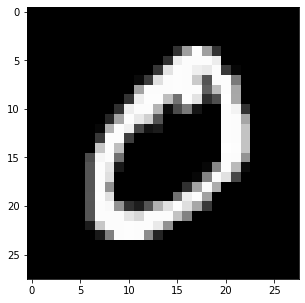

In [13]:
# Veri Setinden Örnekler Gösterilmesi

plt.figure(figsize = (5,5))
plt.imshow(x_train[1], cmap = 'gray')

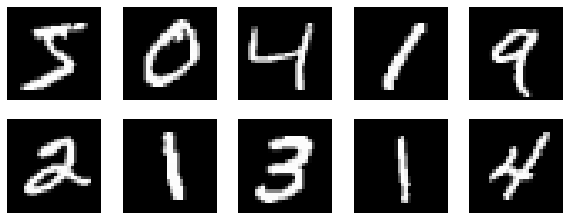

In [14]:
plt.figure(figsize = (10,10))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap = 'gray')
  plt.axis('off')

In [15]:
def visualize_img(data):
  plt.figure(figsize = (10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap = 'gray')
    plt.axis('off')

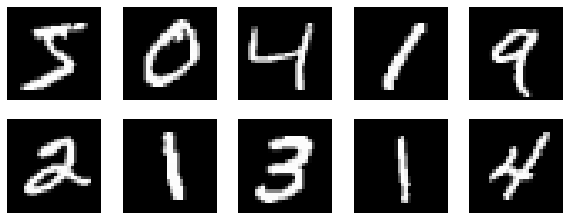

In [16]:
visualize_img(x_train)

In [17]:
# RGB (0-255 arasında değerler alır. Bütün renkler bu 3 renkle ifade edilir.)
# r=250 g=10 b=240 mor rengini verir. Uluslararası arenada böyle kabul edilmiştir.
# Bütün değerler 0 olursa siyah 255 olursa beyaz rengi ifade eder.



In [17]:
x_train[2] # Çıkan numpy veri dizisindeki matris formattaki değerler rgb değerlerdir

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [18]:
x_train[2].shape

(28, 28)

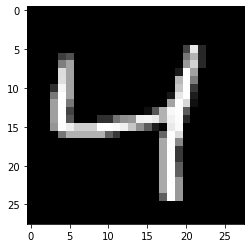

In [19]:
plt.imshow(x_train[2], cmap = 'gray')

In [20]:
x_train[2][14,10]  # verideki belirttiğimiz değerdeki piksellere giderek rgb ort. değerini veriyor.

49

In [21]:
x_train[2].mean()

24.799744897959183

In [22]:
x_train[2][14:20, 10:20].mean()  # Resimin belli bölgesini ele alabiliyoruz ve orası üzerinde işlemler yapabiliyoruz

96.51666666666667

In [23]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap = 'gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y], 2)), xy = (y,x),
                  color = 'white' if img[x][y] < threshold else 'black')

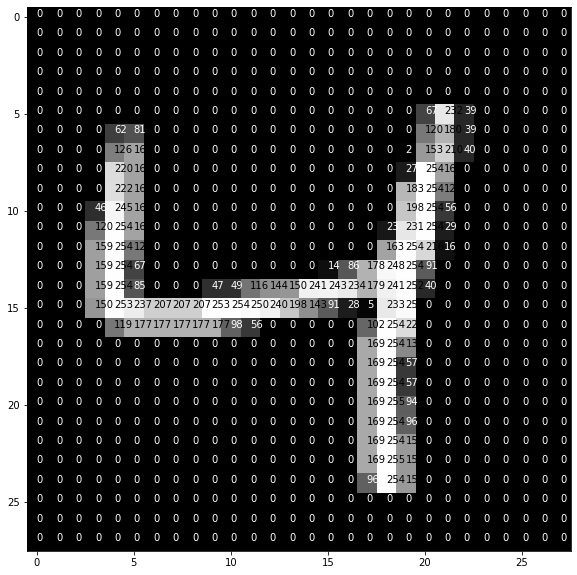

In [24]:
pixel_visualize(x_train[2])

# 3) Veriyi Hazırlamak (Data Preparation)

# Encoding


* Önce : [0,1,2,3,4,5,6,7,8,9]
* Sonra: [0,0,1,0,0,0,0,0,0,0]



In [25]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
y_train[0:5]   # y_train deki sayısal değerleri encoding tarzda ifade ediyor.Hangi sayı ise o kısım 1 değerini alıyor.

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Reshaping

In [30]:
image_size = x_train.shape[1]

In [32]:
image_size

28

In [28]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)  # 1 burada demek oluyor ki görsellerdeki piksellerin değerlerini de getir demek
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train boyutu : {x_train.shape}")
print(f"x_test boyutu : {x_test.shape}")

x_train boyutu : (60000, 28, 28, 1)
x_test boyutu : (10000, 28, 28, 1)


# Standardization

In [29]:
# Piksellerdeki değerleri 0-1 arasına çevirerek eğitim sürecini daha hızlı ve öğrenme sürecini dahah doğru hale getiriyoruz.

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# Modelleme ( Modeling)

Sinir Ağı Mimarisini Tanımlamak

In [31]:
model = tf.keras.Sequential([
    Flatten(input_shape = (28, 28, 1)),                     # inputun şekillendiği yapay sinir ağının anlayabileceği hale dönüştüğü yerdir
    Dense(units=128, activation = 'relu', name = 'layer1'), # Gizli katmanımızdır. 128 nöron vardır. 
    Dense(units=num_labels, activation = 'softmax', name='output_layer')])  # çıktı katmanımızdır. Çok sınıflı bir Sınıflandırma olduğu için softmax kullanılmıtır.

model.compile(loss = 'categorical_crossentropy',            # çok sınıflı sınıflandırma olduğu için 'categorical_crossentropy' kullandık.
              optimizer = 'adam',                           # loss fonksiyonunu minimize edecek optimizasyon yöntemidir.farklı algoritmalar da vardır.
              metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])  # hata metriklerine bakarak gidiş yönümüzü belirleyeceğiz. 'accuracy' matriğidir.


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))  # epochs=5 sayısı ile 5 tur at diyoruz. 

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0635 - precision: 0.9848 - recall: 0.9789 - accuracy: 0.9816 - val_loss: 0.0847 - val_precision: 0.9788 - val_recall: 0.9709 - val_accuracy: 0.9754
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0525 - precision: 0.9874 - recall: 0.9823 - accuracy: 0.9847 - val_loss: 0.0791 - val_precision: 0.9786 - val_recall: 0.9730 - val_accuracy: 0.9747
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0450 - precision: 0.9893 - recall: 0.9850 - accuracy: 0.9869 - val_loss: 0.0776 - val_precision: 0.9792 - val_recall: 0.9736 - val_accuracy: 0.9765
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0378 - precision: 0.9909 - recall: 0.9874 - accuracy: 0.9891 - val_loss: 0.0766 - val_precision: 0.9797 - val_recall: 0.9739 - val_accuracy: 0.9768
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0320 - precision: 0.9924 - r

# Model Başarısını Değerlendirme (Evaluation)

In [35]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0127 - precision: 0.9975 - recall: 0.9969 - accuracy: 0.9972 - val_loss: 0.0796 - val_precision: 0.9800 - val_recall: 0.9772 - val_accuracy: 0.9782
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0112 - precision: 0.9977 - recall: 0.9970 - accuracy: 0.9974 - val_loss: 0.0787 - val_precision: 0.9791 - val_recall: 0.9771 - val_accuracy: 0.9779
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0087 - precision: 0.9986 - recall: 0.9982 - accuracy: 0.9984 - val_loss: 0.0801 - val_precision: 0.9803 - val_recall: 0.9773 - val_accuracy: 0.9785
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0083 - precision: 0.9988 - recall: 0.9983 - accuracy: 0.9985 - val_loss: 0.0847 - val_precision: 0.9794 - val_recall: 0.9776 - val_accuracy: 0.9778
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0068 - precision: 0.9988 - r

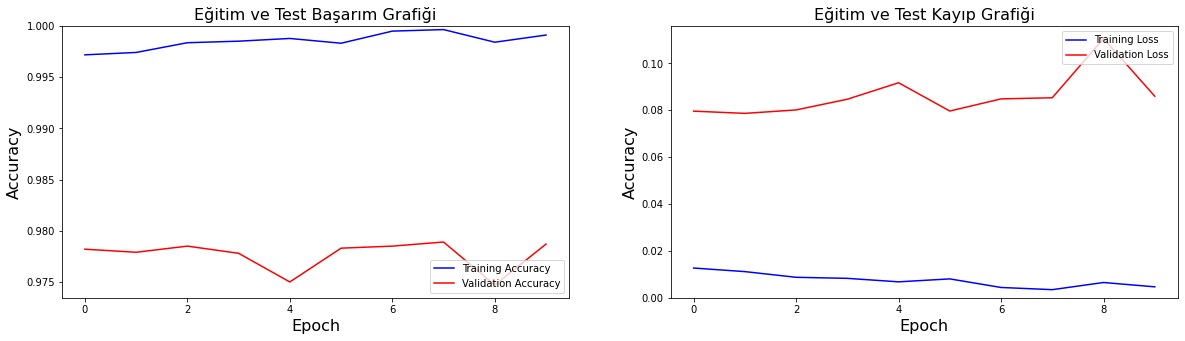

In [36]:
################################
# Accuracy ve Loss Grafikleri
###############################

#------------------------ Grafik_1 Accuracay------------------------------

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)


#------------------------ Grafik_2 Loss----------------------------------

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)
plt.show()

In [40]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose = False)
print("\n Test Accuracy : %.1f%% " % (100.0 * acc ))
print("\n Test Loss : %.1f%% " % (100.0 * loss ))
print("\n Test Precision : %.1f%% " % (100.0 * precision ))
print("\n Test Recall : %.1f%% " % (100.0 * recall ))


 Test Accuracy : 97.9% 

 Test Loss : 8.6% 

 Test Precision : 98.0% 

 Test Recall : 97.8% 
